## Load in modules

In [1]:
import jwstniriss as jw
import numpy as np #numpy gives us better array management 

## Load plotting modules

In [2]:
import matplotlib  #ploting
matplotlib.use("Agg")  #some hack to stop the bouncing python icon when plotting
import matplotlib.pyplot as plt
#next line is to show plots inline with jupyter
#%matplotlib inline 
from matplotlib.colors import LogNorm #for better display of FITS images

## Enable Inline plotting

In [3]:
%matplotlib inline

## Show documentation for each routines

In [4]:
jw.read_datacube.__doc__

'Usage scidata=datacube(filename)'

In [5]:
jw.r2s.__doc__

'Usage: zpt,slope,image=r2s(scidata)'

In [6]:
jw.apertureflux.__doc__

'flux=jw.apertureflux(scidata,tr,20,0) - Extract Flux using simple Aperture'

In [7]:
jw.tracespec.__doc__

'tr, trpsf = jw.tracespec(image)  - Finds trace of spectral orders'

## Read in a datacube

In [8]:
scidata=jw.read_datacube("samples/cube-700-CLR.fits")

## Show Raw data

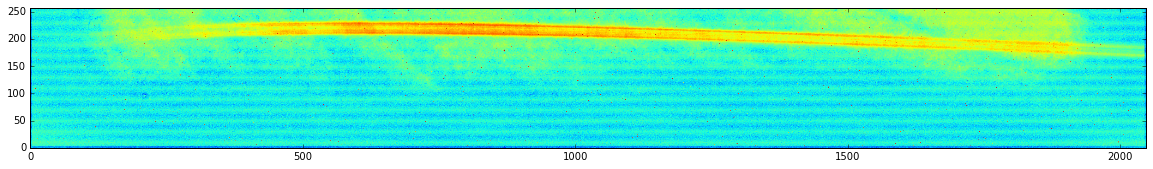

In [24]:
plt.figure(figsize=(20,4)) #adjust size of figure
imgplot = plt.imshow(np.transpose(scidata[4,:,:]),norm=LogNorm())
plt.axis((0,image.shape[0],0,image.shape[1]))
plt.show()

## Fit robust line to ramps to produce image

In [10]:
zpt,slope,image=jw.r2s(scidata)

## Display background / bias 

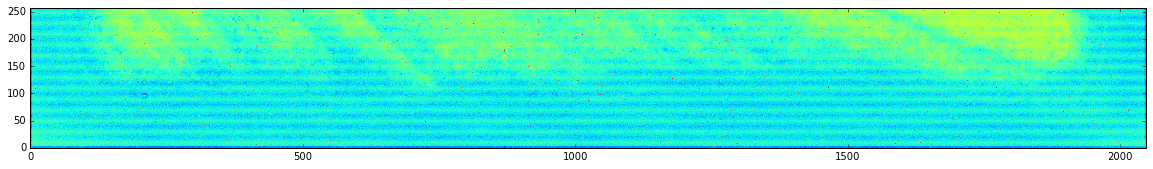

In [23]:
plt.figure(figsize=(20,4)) #adjust size of figure
imgplot = plt.imshow(np.transpose(zpt),norm=LogNorm())
plt.axis((0,image.shape[0],0,image.shape[1]))
plt.show()

## Display corrected Image

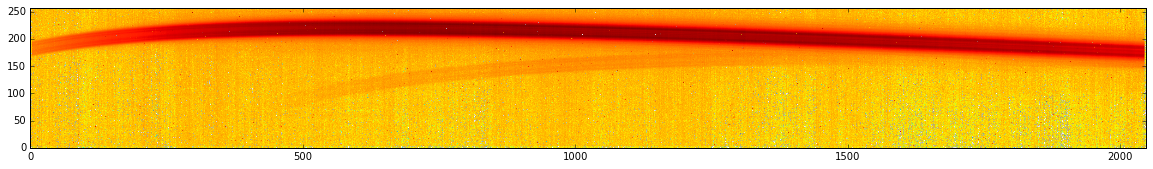

In [22]:
plt.figure(figsize=(20,4)) #adjust size of figure
imgplot = plt.imshow(np.transpose(image),norm=LogNorm())
plt.axis((0,image.shape[0],0,image.shape[1]))
plt.show()

## Extract Trace for n=1

In [19]:
tr, trpsf = jw.tracespec(image) #run the trace program to find the n=1 spectrum
#tr contains the trace for each order, trpsf contains the model parameters from the PSF fit.

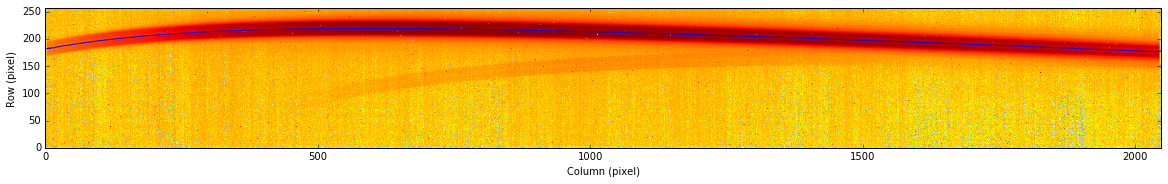

In [25]:
plt.figure(figsize=(20,4)) #adjust size of figure
imgplot = plt.imshow(np.transpose(image),norm=LogNorm()) #added log stretch to the plot
#imgplot = plt.colorbar() #add colour bar
plt.plot(tr[:,0],c='b') #overlay trace for n=1
plt.xlabel('Column (pixel)') #x-label
plt.ylabel('Row (pixel)') #y-label
x1,x2,y1,y2 = plt.axis() 
plt.axis((0,image.shape[0],0,image.shape[1]))
plt.show()

## Extract Trace With Aperture

In [29]:
flux=jw.apertureflux(image,tr,20,0)  #extract the flux along the trae using a simple aperture

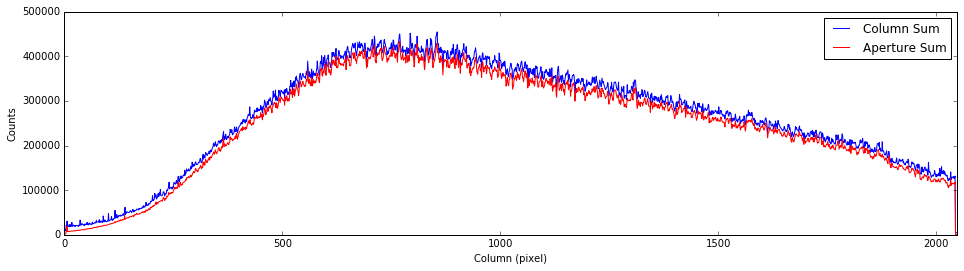

In [33]:
plt.figure(figsize=(16,4)) #adjust size of figure
plt.plot(np.sum(image,axis=1),label='Column Sum') #Plot the sum of each column
plt.plot(flux,c='r',label='Aperture Sum') #Plot the sum of each column
plt.xlabel('Column (pixel)') #x-label
plt.ylabel('Counts') #y-label
x1,x2,y1,y2 = plt.axis() 
x1=0
x2=image.shape[0]
y1=0
plt.axis((x1,x2,y1,y2))
plt.legend()
plt.show()